<a href="https://colab.research.google.com/github/abrichr/visual-contact-tracing/blob/master/My_AlphaPose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Install PyTorch
! pip3 install torch==1.1.0 torchvision==0.3.0

# 2. Get AlphaPose
! rm -rf AlphaPose
! git clone https://github.com/MVIG-SJTU/AlphaPose.git

# 3. install
! export PATH=/usr/local/cuda/bin/:$PATH
! export LD_LIBRARY_PATH=/usr/local/cuda/lib64/:$LD_LIBRARY_PATH
! pip install cython
! sudo apt-get install libyaml-dev
! cd AlphaPose && python setup.py build develop --user

     |████████████████████████████████| 676.9MB 26kB/s 
     |████████████████████████████████| 2.6MB 50.9MB/s 
  Found existing installation: torch 1.5.0+cu101
    Uninstalling torch-1.5.0+cu101:
      Successfully uninstalled torch-1.5.0+cu101
  Found existing installation: torchvision 0.6.0+cu101
    Uninstalling torchvision-0.6.0+cu101:
      Successfully uninstalled torchvision-0.6.0+cu101
Cloning into 'AlphaPose'...
remote: Enumerating objects: 1598, done.
remote: Total 1598 (delta 0), reused 0 (delta 0), pack-reused 1598
Receiving objects: 100% (1598/1598), 65.73 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (689/689), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libyaml-doc
The following NEW packages will be installed:
  libyaml-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 55.7 kB of archives.
After this operation, 246 kB of additional disk space will be used.
Get

In [2]:
import os
from os.path import exists, join, basename, splitext

def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=$file_id" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=$confirm_text&id=$file_id" -o $file_name
  
! mkdir -p AlphaPose/detector/yolo/data/
yolo_pretrained_model_path = 'AlphaPose/detector/yolo/data/yolov3-spp.weights'
if not exists(yolo_pretrained_model_path):
  download_from_google_drive('1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC', yolo_pretrained_model_path)

! mkdir -p AlphaPose/detector/tracker/data
tracker_pretrained_model_path = 'AlphaPose/detector/tracker/data/jde.1088x608.uncertainty.pt'
if not exists(tracker_pretrained_model_path):
  download_from_google_drive('1nlnuYfGNuHWZztQHXwVZSL_FvfE551pA', tracker_pretrained_model_path)

! mkdir -p AlphaPose/pretrained
pretrained_model_path = 'AlphaPose/pretrained/fast_res50_256x192.pth'
if not exists(pretrained_model_path):
  download_from_google_drive('1kQhnMRURFiy7NsdS8EFL-8vtqEXOgECn', pretrained_model_path)
  


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1522      0 --:--:-- --:--:-- --:--:--  1528
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  240M    0  240M    0     0  55.6M      0 --:--:--  0:00:04 --:--:-- 83.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1906      0 --:--:-- --:--:-- --:--:--  1906
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  557M    0  557M    0     0  56.5M      0 --:--:--  0:00:09 --:--:-- 74.5M
  % Total    % Received % Xferd  Average Speed   Tim

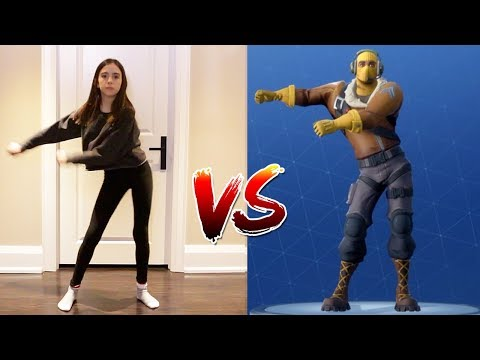

In [3]:
YOUTUBE_ID = 'RXABo9hm8B8'

from IPython.display import YouTubeVideo
YouTubeVideo(YOUTUBE_ID)

In [9]:
!rm -df youtube.mp4
# download the youtube with the given ID
!pip install -q youtube-dl
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4

     |████████████████████████████████| 1.8MB 9.2MB/s 
[youtube] RXABo9hm8B8: Downloading webpage
[download] Destination: youtube.mp4
[download] 100% of 116.25MiB in 00:01
ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-li

In [26]:
! pip install -U PyYAML
! pip install "pillow<7"


# run AlpaPose on these 5 seconds video
!rm -rf AlphaPose_video.avi
! ls -alh
#!cd AlphaPose && python3 scripts/demo_inference.py --sp --video ../video.mp4 --outdir .. --save_video
cfg_file = './configs/coco/resnet/256x192_res50_lr1e-3_1x.yaml'
trained_model = '../' + pretrained_model_path
! mkdir -p out

# TODO: try --pose_track 

! cd AlphaPose && python scripts/demo_inference.py --save_img --cfg $cfg_file --checkpoint $trained_model --video ../video.mp4 --outdir ../out --detector tracker --save_video
! ls -alh out



Requirement already up-to-date: PyYAML in /usr/local/lib/python3.6/dist-packages (5.3.1)
total 121M
drwxr-xr-x  1 root root 4.0K May  3 05:46 .
drwxr-xr-x  1 root root 4.0K May  3 05:29 ..
drwxr-xr-x 15 root root 4.0K May  3 05:36 AlphaPose
-rw-r--r--  1 root root 2.9M May  3 05:47 AlphaPose_video2.mp4
drwxr-xr-x  1 root root 4.0K Apr 29 16:14 .config
-rw-r--r--  1 root root  492 May  3 05:36 cookie
drwxr-xr-x  2 root root 4.0K May  3 05:47 out
drwxr-xr-x  1 root root 4.0K Apr  3 16:24 sample_data
-rw-r--r--  1 root root 1.8M May  3 05:39 video.mp4
-rw-r--r--  1 root root 117M Nov 28 10:20 youtube.mp4
Loading tracking model..
Loading pose model from ../AlphaPose/pretrained/fast_res50_256x192.pth...
  0% 0/120 [00:00<?, ?it/s]Could not find encoder for codec id 27: Encoder not found
Try to use other video encoders...
Network successfully loaded
THCudaCheck FAIL file=/pytorch/aten/src/THC/THCGeneral.cpp line=383 error=11 : invalid argument
THCudaCheck FAIL file=/pytorch/aten/src/THC/THCG

In [28]:
!ls -alh out/vis

def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

# convert the result into MP4
!ffmpeg -y -loglevel info -i out/AlphaPose_video.mp4 out/AlphaPose_video2.mp4

show_local_mp4_video('out/AlphaPose_video2.mp4', width=960, height=720)

total 35M
drwxr-xr-x 2 root root 4.0K May  3 05:56 .
drwxr-xr-x 3 root root 4.0K May  3 05:55 ..
-rw-r--r-- 1 root root 283K May  3 05:55 0.jpg
-rw-r--r-- 1 root root 291K May  3 05:56 100.jpg
-rw-r--r-- 1 root root 285K May  3 05:56 101.jpg
-rw-r--r-- 1 root root 281K May  3 05:56 102.jpg
-rw-r--r-- 1 root root 276K May  3 05:56 103.jpg
-rw-r--r-- 1 root root 275K May  3 05:56 104.jpg
-rw-r--r-- 1 root root 284K May  3 05:56 105.jpg
-rw-r--r-- 1 root root 284K May  3 05:56 106.jpg
-rw-r--r-- 1 root root 290K May  3 05:56 107.jpg
-rw-r--r-- 1 root root 294K May  3 05:56 108.jpg
-rw-r--r-- 1 root root 293K May  3 05:56 109.jpg
-rw-r--r-- 1 root root 298K May  3 05:56 10.jpg
-rw-r--r-- 1 root root 299K May  3 05:56 110.jpg
-rw-r--r-- 1 root root 301K May  3 05:56 111.jpg
-rw-r--r-- 1 root root 283K May  3 05:56 112.jpg
-rw-r--r-- 1 root root 281K May  3 05:56 113.jpg
-rw-r--r-- 1 root root 280K May  3 05:56 114.jpg
-rw-r--r-- 1 root root 282K May  3 05:56 115.jpg
-rw-r--r-- 1 root root 2

In [25]:
! cat out/alphapose-results.json
! find ~ -name 0.jpg
! find /root/.cache/ -name 0.jpg
! find /pytorch -name 0.jpg

[{"image_id": "0.jpg", "category_id": 1, "keypoints": [557.3541259765625, 101.96072387695312, 0.9597997665405273, 577.0616455078125, 82.25321960449219, 0.9450474977493286, 537.6466064453125, 72.39945983886719, 0.9732690453529358, 596.7691040039062, 92.10696411132812, 0.9589687585830688, 508.0853576660156, 92.10696411132812, 0.9445769786834717, 646.0379028320312, 220.20574951171875, 0.9222283959388733, 448.96282958984375, 200.4982452392578, 0.8878716826438904, 734.7216796875, 338.4507751464844, 0.9525293111801147, 379.986572265625, 348.3045349121094, 0.934768795967102, 685.452880859375, 456.69580078125, 0.9250432848930359, 448.96282958984375, 446.8420715332031, 0.9471141695976257, 577.0616455078125, 525.6720581054688, 0.8586695194244385, 448.96282958984375, 496.1108093261719, 0.8232638835906982, 577.0616455078125, 742.4546508789062, 0.898955225944519, 311.01031494140625, 634.0633544921875, 0.9233191013336182, 577.0616455078125, 969.0909423828125, 0.8865494132041931, 242.03402709960938, 